In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import warnings
import pandas as pd
# Librerías necesarias
from IPython.display import display
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## <font color='green'>Actividad 1</font>

Realizar la agrupación de los jugadores de la Liga Española de fútbol en función de sus características de juego utilizando K-means. Los clusters deben corresponder a: portero, defensa, mediocampista (central) y delantero (recuerde que esto es información de apoyo ya que estamos trabajando con aprendizaje no supervisado). El objetivo es verificar si las diferentes clusterizaciones que el algoritmo realiza son coherentes con las dinámicas del fútbol y con los jugadores asociados.

Los datos disponibles para la realización del modelo se encuentran en el archivo **laLiga.csv**. Para mejorar la performance del sistema implementado y facilitar la visualización de los datos, debe considerar sólo los jugadores con más de 2000 minutos de juego.

1. Realice un análisis inicial de los datos.
2. Realice manejo de datos faltantes (si corresponde).
3. Recuerde eliminar la etiqueta de los datos de su vector de entrenamiento.
4. Selecciones las variables para su modelo. Se recomienda la realización de una matriz de correlación.
5. Normalice sus datos.
6. Aplique PCA para reducir la dimensionalidad de sus datos y poder visualizar su modelo en 2D.

```
Hint:

# genera el PCA para generar el modelo
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

#donde X_norm es su data normalizada
```
7. Implemente su modelo K-means.
8. Grafique sus resultados.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
ruta_modulo="/content/drive/MyDrive/05_APRENDIZAJE_NO_SUPERVISADO"
df = pd.read_csv(ruta_modulo+"/data/UL02.csv")

In [20]:
df.head()

Jugador  categoria  Partidos  Minutos_jugados  Goles  Asistencias  \
0      Eden Hazard          3        11              803      1            2   
1    Adnan Januzaj          3        17              804      2            3   
2      Pione Sisto          3        20              804      2            0   
3  Alfonso Pedraza          2        13              808      0            0   
4   Jeison Murillo          2         9              810      0            0   

   Paradas  Goles_encajados  Tiros  Tiros_a_ puerta  ...  \
0        0                0     13                9  ...   
1        0                0     19                5  ...   
2        0                0     27               14  ...   
3        0                0      9              300  ...   
4        0                0      2              100  ...   

   Errores_en_gol_en_contra  Regates_con_exito  Pasesconexito  Precisionpases  \
0                         0                 39             15              86   
1                         0                 20             17              68   
2                         1                 24              9              83   
3                         0                 13            700              75   
4                         0                  1              0              83   

   Cornerscolgados  Faltascolgadas  Faltascolgadasprecisas  Faltas directas  \
0                1               0                       0                0   
1               11               3                       0                2   
2               12               6                       1                1   
3                0               0                       0                0   
4                0               2                       0                0   

   Faltasdirectasapuerta  Golesdefalta  
0                      0             0  
1                      0             0  
2                      0             0  
3                      0             0  
4                      0             0  

[5 rows x 40 columns]

**Exploración inicial**  
Verificacion de nulos  
Identificar el valor promedio y dispersión de las variables.

In [16]:
print(df.isnull().sum())

Jugador                            0
categoria                          0
Partidos                           0
Minutos_jugados                    0
Goles                              0
Asistencias                        0
Paradas                            0
Goles_encajados                    0
Tiros                              0
Tiros_a_ puerta                    0
Precision_tiros                    0
Centros                            0
Centros_ precisos                  0
Precision_centros                  0
Tiros_al palo                      0
Corners_forzados                   0
Faltas_recibidas                   0
Faltas_cometidas                   0
Pases_interceptados                0
Balones_robados                    0
Balones_robado al_ultimo_hombre    0
Tarjetas_amarillas                 0
Tarjetas_rojas                     0
Penaltis_cometidos                 0
Penaltis_forzados                  0
Penaltis_lanzados                  0
Penaltis_anotados                  0
P

In [22]:
sns.countplot(x="categoria", data=df)
plt.title("portero, defensa, mediocampista (central) y delantero ")
plt.show()

In [ ]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
median_series=df.mean(axis=0)
median_series.sort_values(ascending=False)

----------------------
Media de cada variable
----------------------


Minutos_jugados                    1625.725753
Pasesconexito                       361.816054
Centros_ precisos                   267.531773
Tiros_a_ puerta                      93.468227
Precisionpases                       75.969900
Centros                              29.949833
Precision_tiros                      29.685619
Faltas_cometidas                     22.170569
Partidos                             21.371237
Faltas_recibidas                     21.033445
Tiros                                18.518395
Precision_centros                    18.147157
Pases_interceptados                  16.602007
Regates_con_exito                    15.056856
Balones_robados                      14.966555
Faltascolgadas                        7.779264
Corners_forzados                      7.585284
Cornerscolgados                       5.645485
Paradas                               4.709030
Tiros_bloqueados                      4.508361
Tarjetas_amarillas                    4.214047
categoria    

In [ ]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
variance_series = df.var(axis=0)
variance_series.sort_values(ascending=False)

-------------------------
Varianza de cada variable
-------------------------


Pasesconexito                      537760.278131
Centros_ precisos                  439715.813584
Minutos_jugados                    246261.944670
Tiros_a_ puerta                     27803.679356
Centros                              1284.873314
Precision_tiros                       392.088752
Paradas                               306.032502
Tiros                                 297.250499
Precision_centros                     280.635990
Regates_con_exito                     225.597428
Faltas_recibidas                      210.092837
Cornerscolgados                       204.451079
Faltas_cometidas                      181.417117
Pases_interceptados                   143.723620
Faltascolgadas                        117.031649
Precisionpases                        101.760836
Balones_robados                       100.112972
Goles_encajados                        64.568315
Corners_forzados                       48.894548
Tiros_bloqueados                       24.948755
Partidos            

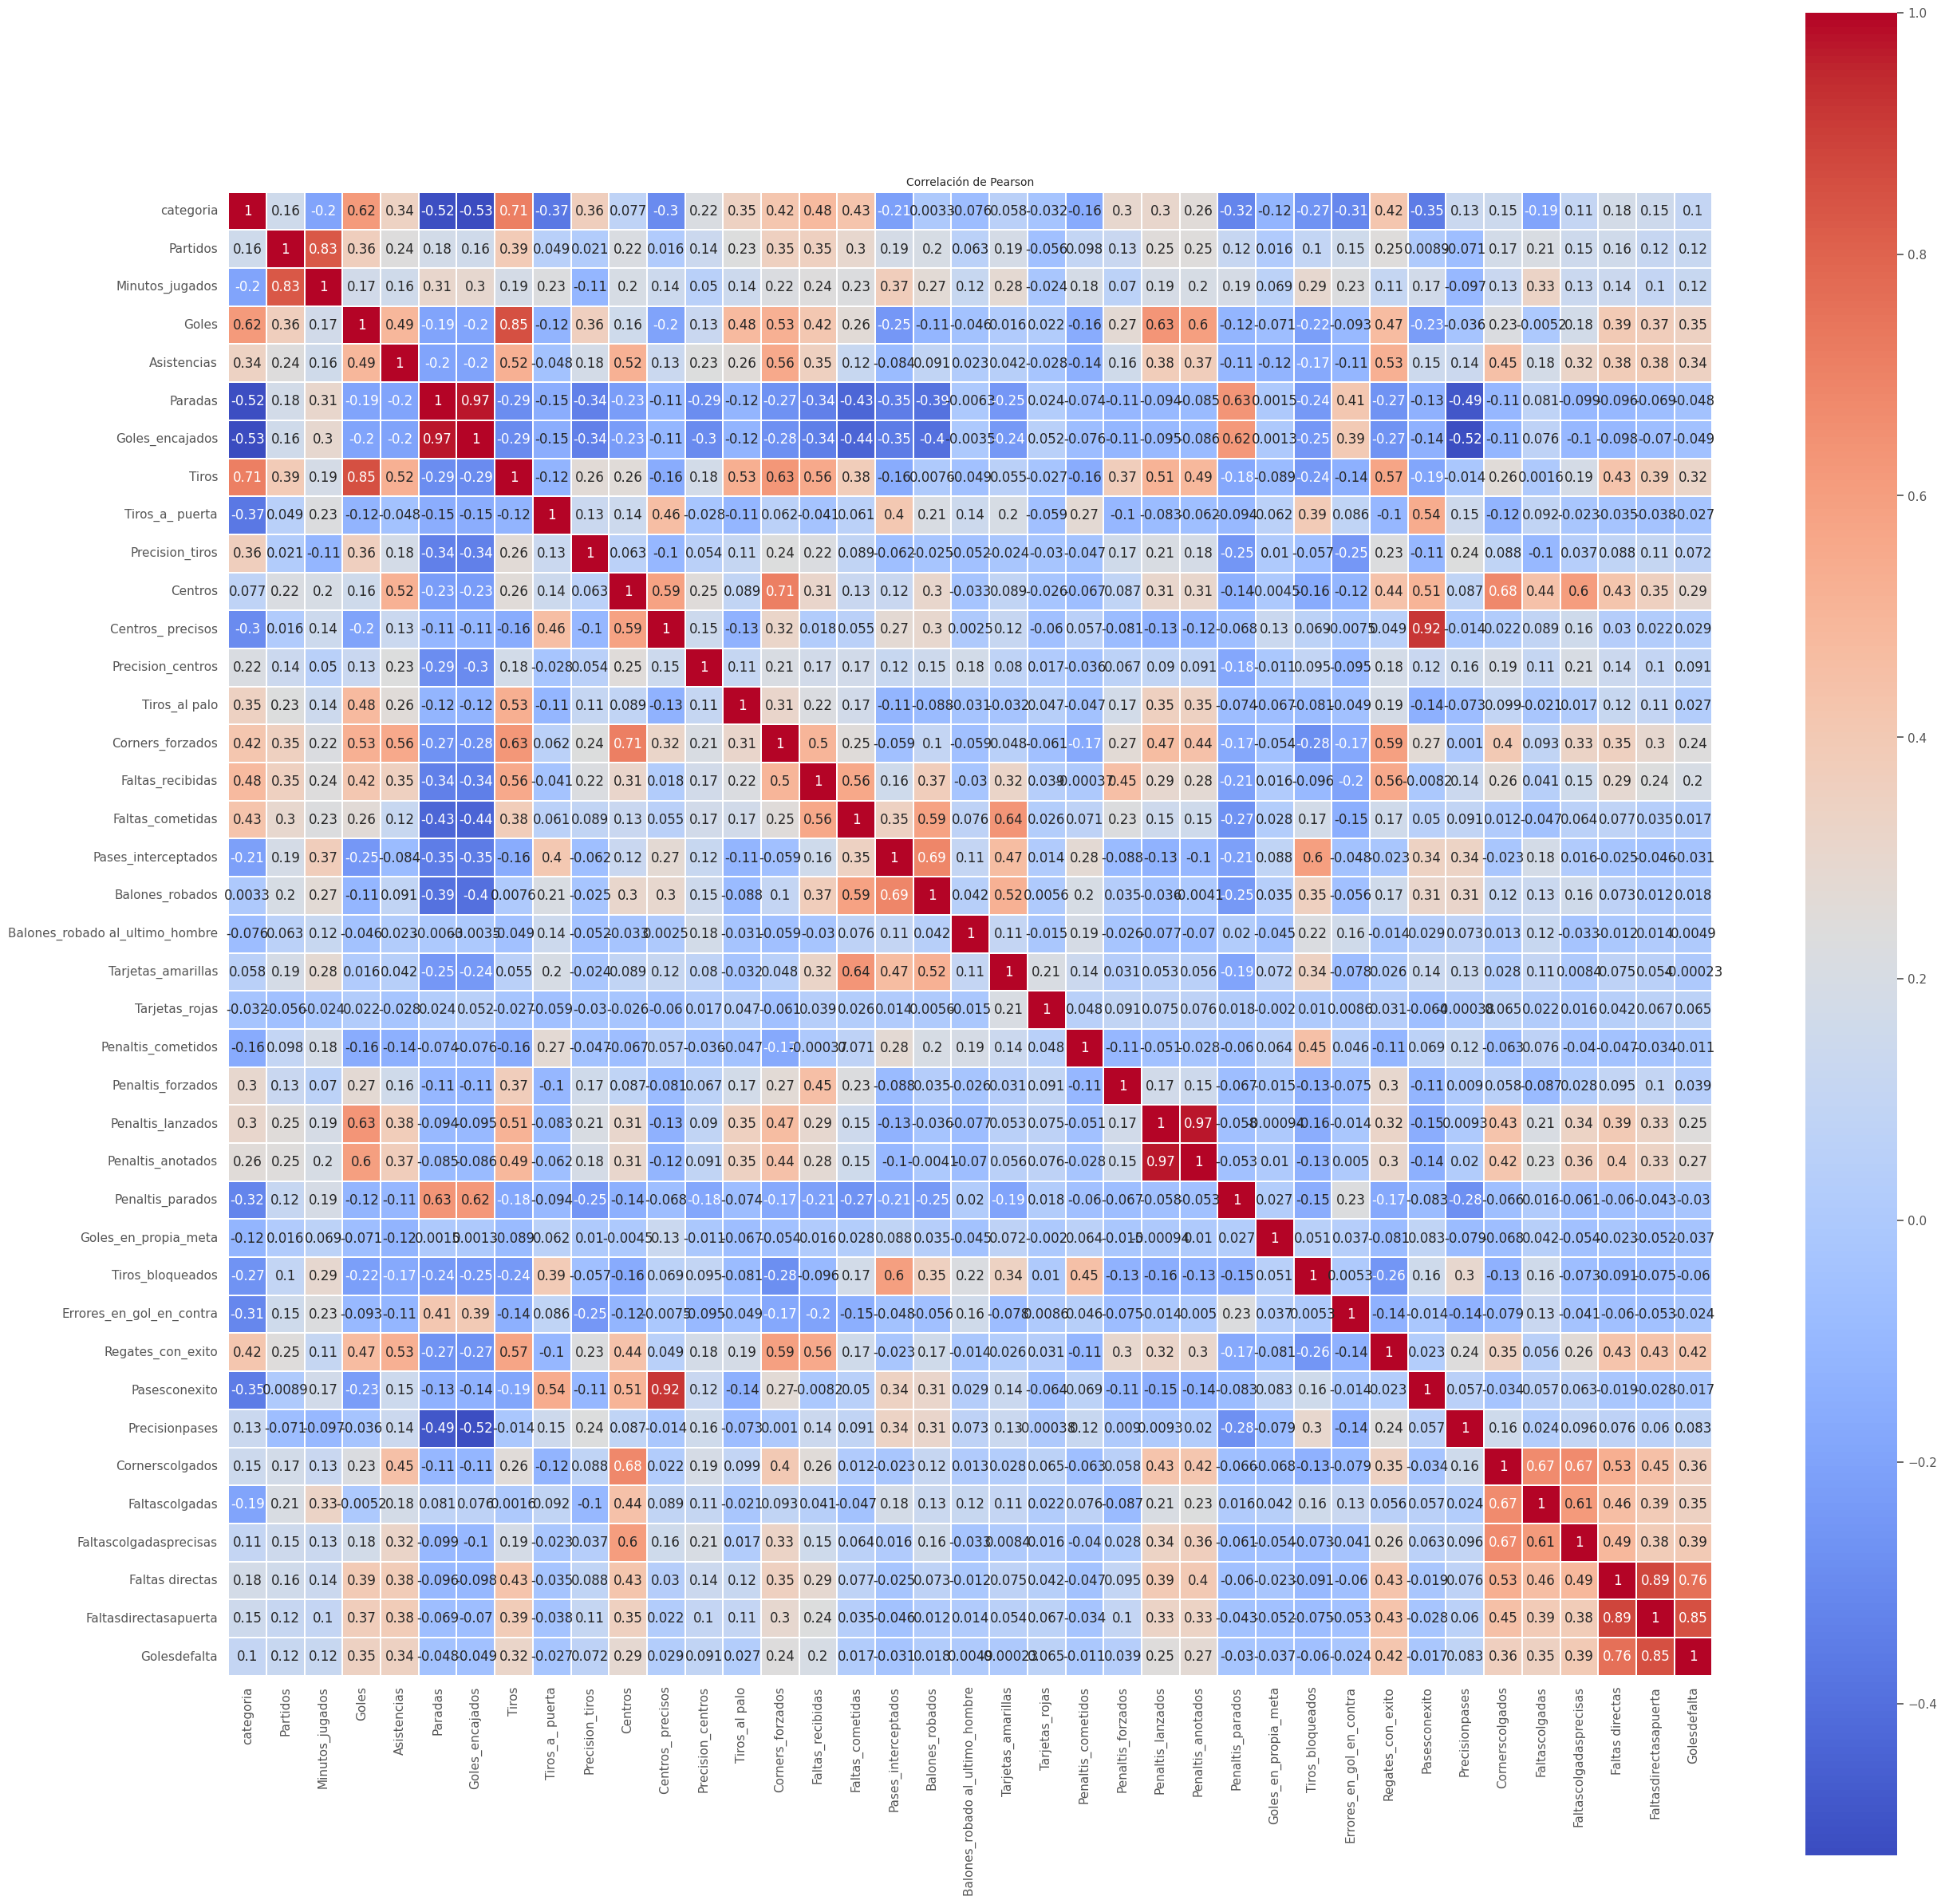

In [26]:
plt.figure(figsize=(30,30))
plt.title('Correlación de Pearson', size = 10)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(df.corr(),
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',cmap="coolwarm",
            annot_kws={'fontsize':12 })
plt.show()

In [30]:
sns.countplot(x="Goles", data=df)
plt.xticks(rotation=90)
plt.show()

**Modelo PCA**

In [23]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

ValueError: ignored